In [98]:
#imporing the library
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [99]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [100]:
df_train = pd.read_csv("P:/Business Analytics/2nd Semester/Big Data/Assignment/train.csv" )
df_test = pd.read_csv("P:/Business Analytics/2nd Semester/Big Data/Assignment/test.csv")
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
#Trying to understand how many survived by Pclass
df_grouped = df_train.groupby('Pclass')[['Survived']].sum()
df_grouped


,Survived
Pclass,
1,136
2,87
3,119


In [103]:
survival_count=df_train['Survived'].value_counts()
survival_count
# 1 - Survived



0    549
1    342
Name: Survived, dtype: int64

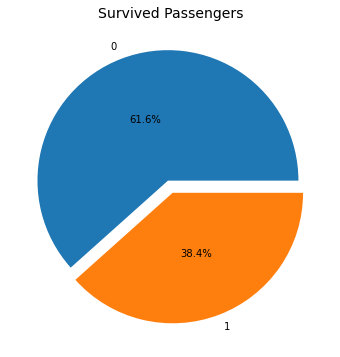

In [104]:
pie, ax = plt.subplots(figsize=[10,6])
labels = survival_count.keys()
plt.pie(x=survival_count, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Survived Passengers", fontsize=14);

In [105]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

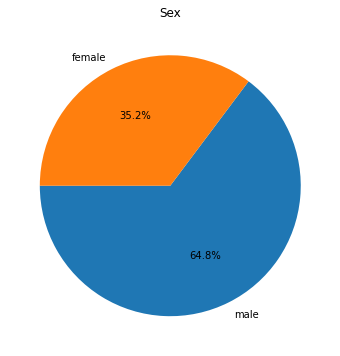

In [106]:
# gender counts (Femal Vs Male)
gender_counts = df_train.Sex.value_counts()
plt.figure(figsize=(12,6))
plt.title('Sex')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [107]:
#Survived by gender count 
df_train[df_train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

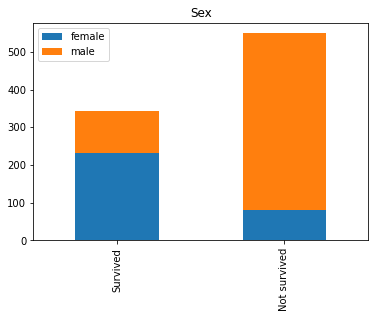

In [108]:
#Number of survived and Not Survived by gender

survived = df_train[df_train['Survived']==1]['Sex'].value_counts()
not_survived = df_train[df_train['Survived']==0]['Sex'].value_counts()

df = pd.DataFrame([survived,not_survived])
df.index=['Survived','Not survived']
df.plot(kind='bar',stacked=True,fig=(18,6),title='Sex')
plt.show()

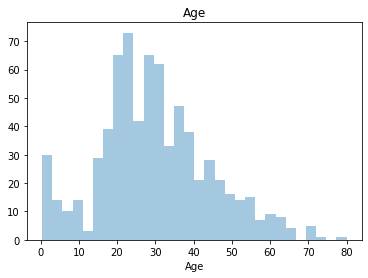

In [109]:
plt.title('Age')
sns.distplot(df_train.Age, bins=30, kde=False);
#Here, showing ['Age'] variable, the most number of passenger aged between 20 to 40.

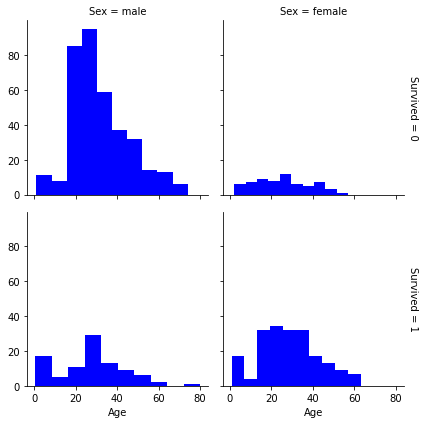

In [110]:
#Survived Vs. Not Survived by Age & Sex

g = sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="blue");

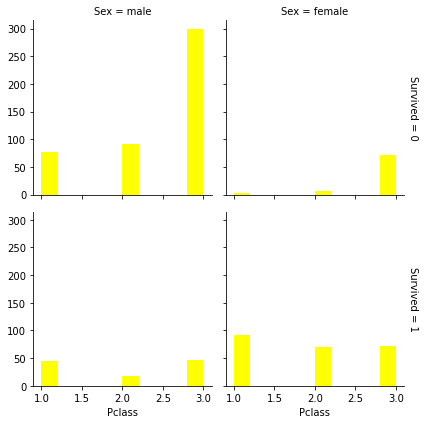

In [111]:
#Survived Vs. Not Survived by Pclass & Sex

g = sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Pclass",color="yellow");

In [112]:
#Number of Survived by Parch , ['parch'] which refer to Number of Parents/Children Aboard.

df_train[df_train['Survived']==1]['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [113]:
#Number of Survived by SibSp , ['sibsp'] refer to Number of Siblings/Spouses Aboard

df_train[df_train['Survived']==1]['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

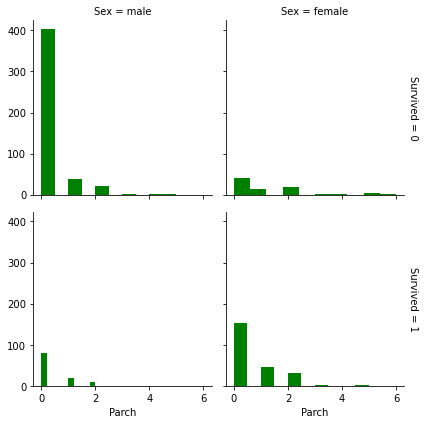

In [114]:
graph = sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True)
graph.map(plt.hist, "Parch",color="green");
#As we saw in the graphs, Passenger with 0 Parch and 0 SibSp has more chance to survive.

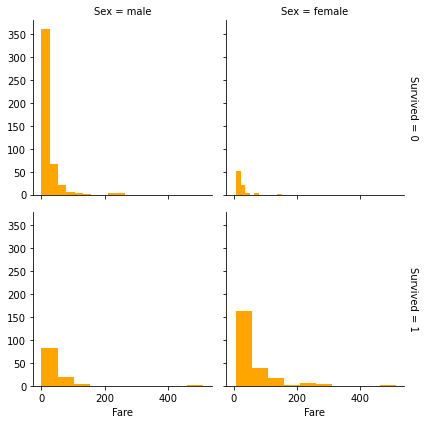

In [115]:
#Survived Vs. UnSurvived by Fare & Sex

graph = sns.FacetGrid(df_train, col="Sex", row="Survived", margin_titles=True)
graph.map(plt.hist, "Fare",color="orange");
#Male with lower Fare are likely to unsurvive.

In [116]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [117]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

    
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [118]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [119]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [120]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [121]:
pd.set_option('display.max_columns', None)

In [122]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)
missing_values

Age            177
Deck             0
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [123]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [124]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [125]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,8
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S,8
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,3


In [126]:
df_train = df_train.drop(['Ticket','Name'], axis=1)
df_test = df_test.drop(['Ticket','Name'], axis=1)

In [127]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,22.0,1,0,7.2500,S,8
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,8
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,8
887,888,1,1,1,19.0,0,0,30.0000,S,2
888,889,0,3,1,NaN,1,2,23.4500,S,8
889,890,1,1,0,26.0,0,0,30.0000,C,3


In [128]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [129]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [130]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,22.0,1,0,7,0,8
1,2,1,1,1,38.0,1,0,71,1,3
2,3,1,3,1,26.0,0,0,7,0,8
3,4,1,1,1,35.0,1,0,53,0,3
4,5,0,3,0,35.0,0,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13,0,8
887,888,1,1,1,19.0,0,0,30,0,2
888,889,0,3,1,NaN,1,2,23,0,8
889,890,1,1,0,26.0,0,0,30,1,3


In [131]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,0,34.5,0,0,7,2,8
1,893,3,1,47.0,1,0,7,0,8
2,894,2,0,62.0,0,0,9,2,8
3,895,3,0,27.0,0,0,8,0,8
4,896,3,1,22.0,1,1,12,0,8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8,0,8
414,1306,1,1,39.0,0,0,108,1,3
415,1307,3,0,38.5,0,0,7,0,8
416,1308,3,0,NaN,0,0,8,0,8


In [132]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age = dataset["Age"].copy()
    age[np.isnan(age)] = rand_age
    dataset["Age"] = age
    dataset["Age"] = df_train["Age"].astype(int)

In [133]:
X_train = df_train.drop('Survived', axis=1)
Y_train = df_train['Survived']

In [134]:
logregmodel = LogisticRegression()
logregmodel.fit(X_train, Y_train)

Y_pred = logregmodel.predict(df_test)


C:\Users\Prince Bhardwaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
Accuracy = round(logregmodel.score(X_train, Y_train) * 100, 2)
Accuracy

80.36

In [149]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(df_test)  
acc_decision_tree = round((decision_tree.score(X_train, Y_train)*100),2 )
acc_decision_tree

100.0

In [150]:
prediction1 = decision_tree.predict(df_test)
prediction2 = logregmodel.predict(df_test)


In [151]:
# prepare submission
submissionRF = pd.DataFrame({'PassengerID': df_test['PassengerId'], 'Survived': prediction1})
submissionRF.to_csv('P:/Business Analytics/2nd Semester/Big Data/Assignment/submissionRF.csv', index=False)

submissionLR = pd.DataFrame({'PassengerID': df_test['PassengerId'], 'Survived': prediction2})
submissionLR.to_csv('P:/Business Analytics/2nd Semester/Big Data/Assignment/submissionLR.csv', index=False)
